# Company Default Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Setting working directory

In [531]:
import os
os.chdir('F:/Hassan/Data science/GL/FRA/')

os.getcwd()

'F:\\Hassan\\Data science\\GL\\FRA'

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [3]:
Company = pd.read_csv('Company data.csv')

#Glimpse of Data
Company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


#### Fixing messy column names (containing spaces) for ease of use

In [4]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc')

#### Checking top 5 rows again

In [5]:
Company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [6]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3541 
The number of columns (variables) is 52


#### Checking datatype of all columns

In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
Num                                            3541 non-null int64
Networth_Next_Year                             3541 non-null float64
Total_assets                                   3541 non-null float64
Net_worth                                      3541 non-null float64
Total_income                                   3343 non-null float64
Change_in_stock                                3083 non-null float64
Total_expenses                                 3402 non-null float64
Profit_after_tax                               3410 non-null float64
PBDITA                                         3410 non-null float64
PBT                                            3410 non-null float64
Cash_profit                                    3410 non-null float64
PBDITA_as_perc_of_total_income                 3473 non-null float64
PBT_as_perc_of_total_income                    3473 non-null float6

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [8]:
Company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


#### Transforming Target variable 'Networth_Next_Year' into 1 & 0

In [9]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [10]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,8890.6
1,0,394.3
2,0,92.2
3,0,2.7
4,0,109.0
5,0,688.6
6,0,246.0
7,0,13.7
8,0,291.5
9,1,-7.3


#### What does variable 'default' look like

In [11]:
Company['default'].value_counts()

0    3298
1     243
Name: default, dtype: int64

#### Checking proportion of default

In [12]:
243/(3298+243)

0.06862468229313753

#### Checking summary statistics of default variable

In [13]:
Company['default'].describe()

count    3541.000000
mean        0.068625
std         0.252851
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

Average default rate matches with overall default rate of 6.8%

#### Lets check for missing values in the dataset

In [14]:
Company.isnull().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                    198
Change_in_stock                                 458
Total_expenses                                  139
Profit_after_tax                                131
PBDITA                                          131
PBT                                             131
Cash_profit                                     131
PBDITA_as_perc_of_total_income                   68
PBT_as_perc_of_total_income                      68
PAT_as_perc_of_total_income                      68
Cash_profit_as_perc_of_total_income              68
PAT_as_perc_of_net_worth                          0
Sales                                           259
Income_from_financial_services                  935
Other_income                                   1295
Total_capita

There are missing values in the dataset

#### Lets treat these missing values with median (replacement with median eliminates impact of outliers in the treatment)

In [15]:
#dropping 'Deposits_accepted_by_commercial_banks' as its completely(100%) blank
col=list(Company.drop(['Deposits_accepted_by_commercial_banks'], axis=1))

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Company = pd.DataFrame(imputer.fit_transform(Company))
Company.columns=col
Company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1.0,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,0.0
1,2.0,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,0.0
2,3.0,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,9.24,0.23,6.40,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,0.0
3,4.0,2.7,2.7,2.7,444.9,1.6,407.7,8.8,35.4,12.4,...,17.27,9.76,0.00,52404.0,10.0,0.00,0.00,2.7,9.10,0.0
4,5.0,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,9.10,0.0


### Let us try & test significance of few variables starting with 'Total_income' & 'PBT_as_perc_of_total_income' in predicting Networth_Next_Year(default)

#### Checking Descriptive statistics of the variable 'PBT_as_perc_of_total_income'

In [16]:
Company['PBT_as_perc_of_total_income'].describe()

count     3541.000000
mean       -16.883635
std        421.337332
min     -21340.000000
25%          0.600000
50%          3.310000
75%          8.630000
max        100.000000
Name: PBT_as_perc_of_total_income, dtype: float64

#### Checking Descriptive statistics of the variable 'PBT_as_perc_of_total_income' for non defaulters

In [17]:
Company.loc[Company['default'] == 0,'PBT_as_perc_of_total_income'].describe()

count    3298.000000
mean       -3.855588
std       196.861553
min     -9700.000000
25%         0.982500
50%         3.580000
75%         9.172500
max       100.000000
Name: PBT_as_perc_of_total_income, dtype: float64

For companies whose ***have not*** defaulted, median 'Profit before tax (as % of income) is about 3.7'

#### Checking Descriptive statistics of the variable 'PBT_as_perc_of_total_income' for defaulters

In [18]:
Company.loc[Company['default'] == 1,'PBT_as_perc_of_total_income'].describe()

count      243.000000
mean      -193.700494
std       1426.590111
min     -21340.000000
25%        -31.705000
50%         -5.090000
75%          0.000000
max         92.380000
Name: PBT_as_perc_of_total_income, dtype: float64

For companies whose ***have*** defaulted, median 'Profit before tax (as % of income) is about -5.9'

- In conclusion what it means is, typical good companies makes a profit of about 3.7 units per 100 units of income
- And a typical defaulted companies loses about 5.9 units per 100 units of income

### Outlier detection & Treatment

#### Creating outlier identification (Lower & Upper whiskers) function

In [19]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

#### lets check outliers(Lower and Upper whiskers) in these variables

In [20]:
check_outlier(Company['Networth_Next_Year'])

(-604.9, 1092.7)

In [21]:
check_outlier(Company['Total_income'])

(-1707.4499999999998, 3168.95)

In [22]:
check_outlier(Company['PBT_as_perc_of_total_income'])

(-11.445000000000002, 20.675000000000004)

#### Capping the outliers

In [23]:
Company_copy = Company.copy()

#### Deleting records higher than upper whisker (as deletion is loss of information, we are doing it on copy of dataset)

In [24]:
# Dropping records higher than upper whisker
Company_copy.drop(Company_copy[Company_copy.Networth_Next_Year > 1092.7].index, inplace=True)
Company_copy.drop(Company_copy[Company_copy.Total_income > 3442.6].index, inplace=True)
Company_copy.drop(Company_copy[Company_copy.PBT_as_perc_of_total_income > 21.2].index, inplace=True)

# Capping values lower than lower whisker
Company_copy['Networth_Next_Year'] = np.where(Company_copy['Networth_Next_Year'] <-604.9, -604.9,Company_copy['Networth_Next_Year'])
Company_copy['Total_income'] = np.where(Company_copy['Total_income'] <-1895.2, -1895.2,Company_copy['Total_income'])
Company_copy['PBT_as_perc_of_total_income'] = np.where(Company_copy['PBT_as_perc_of_total_income'] <-11.8, -11.8,Company_copy['PBT_as_perc_of_total_income'])

In [25]:
Company_copy.shape

(2802, 52)

### Lets visualise these variables to understand its significance over Net_worth_next_year

#### Visualising Total income vs Default - Without outlier removal

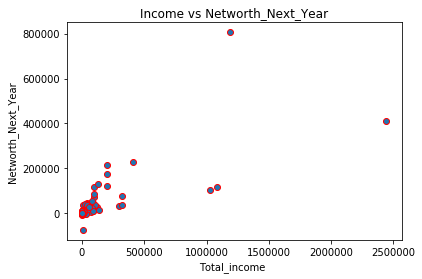

In [26]:
plt.scatter(Company['Total_income'], Company['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Total_income ')
plt.ylabel('Networth_Next_Year')
plt.title('Income vs Networth_Next_Year')
plt.show()

#### Visualising Total income vs Default - After outlier removal

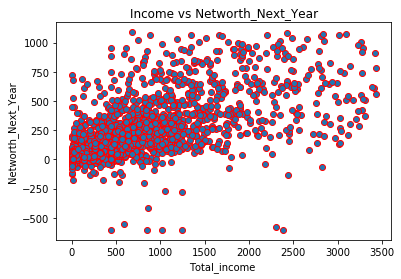

In [27]:
plt.scatter(Company_copy['Total_income'], Company_copy['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Total_income ')
plt.ylabel('Networth_Next_Year')
plt.title('Income vs Networth_Next_Year')
plt.show()

#### Visualising PBT_as_perc_of_total_income vs Default - Without outlier removal

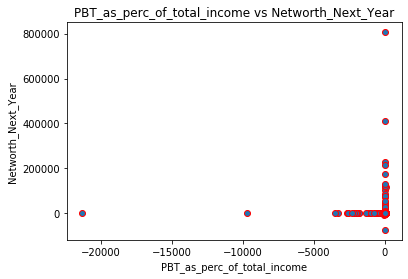

In [28]:
plt.scatter(Company['PBT_as_perc_of_total_income'], Company['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBT_as_perc_of_total_income')
plt.ylabel('Networth_Next_Year')
plt.title('PBT_as_perc_of_total_income vs Networth_Next_Year')
plt.show()

#### Visualising PBT_as_perc_of_total_income vs Default - After outlier removal

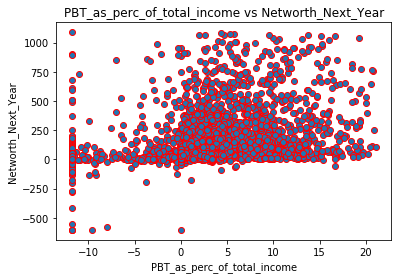

In [29]:
plt.scatter(Company_copy['PBT_as_perc_of_total_income'], Company_copy['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBT_as_perc_of_total_income')
plt.ylabel('Networth_Next_Year')
plt.title('PBT_as_perc_of_total_income vs Networth_Next_Year')
plt.show()

Above bivariate plots suggest that such variables might be potential interesting variables to study for modeling 'default'

# Model Building using Logistic Regression for 'Probability at default'
### with variable 'PBT_as_perc_of_total_income'  

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 - {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [30]:
import statsmodels.formula.api as SM

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [31]:
f_1 = 'default ~ PBT_as_perc_of_total_income'

#### Fitting the logistic regression model

In [32]:
model_1 = SM.logit(formula = f_1, data=Company).fit()

Optimization terminated successfully.
         Current function value: 0.245922
         Iterations 7


#### Studying whether this equation is significant or not

In [33]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3541
Model:                          Logit   Df Residuals:                     3539
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                 0.01658
Time:                        22:22:09   Log-Likelihood:                -870.81
converged:                       True   LL-Null:                       -885.49
Covariance Type:            nonrobust   LLR p-value:                 6.025e-08
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.6414      0.068    -39.088      0.000      -2.774      -2.509
PBT_as_perc_of_total_income    -0.0011      0.000     -4.541      0.000      -0.002      -0.001
===============================================================================================
"""

We can see that variable is significant & can be used to discriminate cases of deault

#### Checking the coefficients

In [34]:
coefficients = model_1.params
coefficients

Intercept                     -2.641352
PBT_as_perc_of_total_income   -0.001121
dtype: float64

#### Printing the confidence intervals of odds ratio

In [35]:
conf2 = model_1.conf_int()
print("odds ratio with confidence intervals")
print(np.exp(conf2))

odds ratio with confidence intervals
                                    0         1
Intercept                    0.062425  0.081357
PBT_as_perc_of_total_income  0.998396  0.999363


#### Checking distribution of fitted values

In [36]:
y_prob_pred_1 = model_1.predict()
np.percentile(y_prob_pred_1,[0,10,25,50,75,100])

array([0.05988995, 0.06542331, 0.0659256 , 0.06629392, 0.06648227,
       1.        ])

#### Plot of Actual Default vs Predicted default

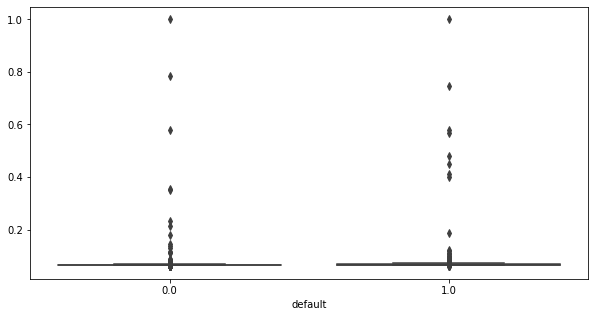

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Company['default'],y=y_prob_pred_1)
plt.show()

#### Adding 2nd variable 'Debt_to_equity_ratio_times' to the logistic regression model

In [38]:
f_2 = 'default ~ PBT_as_perc_of_total_income + Debt_to_equity_ratio_times'

#### Fitting logistic regression model

In [39]:
model_2 = SM.logit(formula = f_2, data=Company).fit()

Optimization terminated successfully.
         Current function value: 0.223492
         Iterations 7


#### Checking the parameters

In [40]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3541
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.1063
Time:                        22:22:11   Log-Likelihood:                -791.38
converged:                       True   LL-Null:                       -885.49
Covariance Type:            nonrobust   LLR p-value:                 1.355e-41
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.8997      0.076    -37.905      0.000      -3.050      -2.750
PBT_as_perc_of_total_income    -0.0010      0.000     -3.886      0.000      -0.002      -0.000
Debt_to_equity_ratio_times      0.0667      0.009      7.765      0.000       0.050       0.084
===============================================================================================
"""

#### Checking the coefficients

In [41]:
coefficients = model_2.params
coefficients

Intercept                     -2.899681
PBT_as_perc_of_total_income   -0.001008
Debt_to_equity_ratio_times     0.066741
dtype: float64

- Positive coefficient value means, higher the Debt to income ratio, more the chance of default
- Similarly, less you are profitable, more the chance of default

#### Checking the descriptive statistics of predicted probabilities

In [42]:
y_prob_pred_2 = model_2.predict()
np.percentile(y_prob_pred_2,[0,10,25,50,75,100])

array([0.04740377, 0.05184925, 0.05267007, 0.05473282, 0.05836263,
       1.        ])

#### Plot of Actual Default vs Predicted default

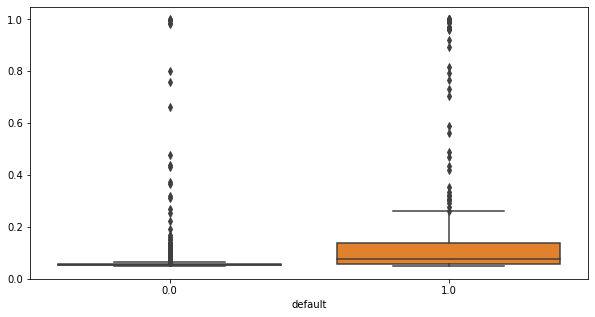

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Company['default'],y=y_prob_pred_2)
plt.show()

### Rechecking the overall default rate

In [44]:
243/(243+3298)

0.06862468229313753

### Let us now see the predicted classes using cutoff 0.07

In [45]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Checking the accuracy of the model using confusion matrix

Confusion matrix terminologies:

- Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
- Specificity (true negatives / all actual negatives) =TN / TN + FP
- Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
- Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

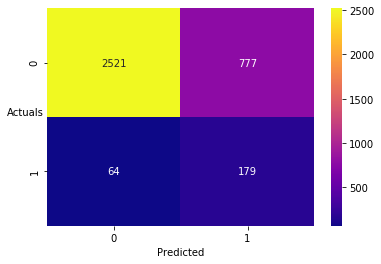

In [81]:
sns.heatmap((metrics.confusion_matrix(Company['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Calculating sensitivity of the model

In [47]:
133/(133+110)

0.5473251028806584

55% of those defaulted were correctly identified as defaulters by the model

#### Calculating specificity of the model

In [48]:
3140/(3140+158)

0.9520921770770163

95% of those not defaulted were correctly identified as non-defaulters by the model

##### Checking model efficiency

In [49]:
(133+3140)/(133+3140+158+110)

0.9243151652075685

Overall 92% of correct predictions to total predictions were made by the model

#### Calculating misclassification rate


In [50]:
1-((133+3140)/(133+3140+158+110))

0.07568483479243149

### Let us now see the predicted classes with cutoff 0.06

In [51]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Checking the accuracy of the model using confusion matrix

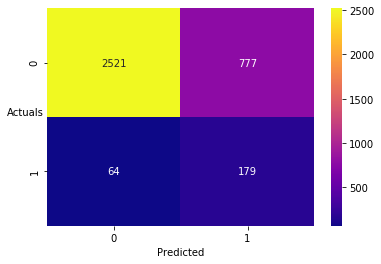

In [82]:
sns.heatmap((metrics.confusion_matrix(Company['default'], y_class_pred)), annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Calculating sensitivity of the model

In [53]:
169/(74+168)

0.6983471074380165

69% of those defaulted were correctly identified as defaulters by the model

#### Calculating specificity of the model

In [54]:
2788/(2788+510)

0.845360824742268

85% of those not defaulted were correctly identified as non-defaulters by the model

##### Checking model efficiency

In [55]:
(2788+169)/(2788+169+510+74)

0.8350748376164925

Overall 84% of correct predictions to total predictions were made by the model

#### Calculating misclassification rate

In [56]:
1-((2788+169)/(2788+169+510+74))

0.16492516238350752

### Let us now see the predicted classes with cutoff 0.058

In [57]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.058:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Checking accuracy of the model using confusion matrix

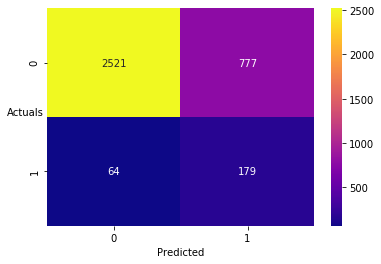

In [85]:
sns.heatmap((metrics.confusion_matrix(Company['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Calculating sensitivity of the model

In [59]:
179/(179+64)

0.7366255144032922

74% of those defaulted were correctly identified as defaulters by the model

#### Calculating specificity of the model

In [60]:
2521/(2521+777)

0.7644026682838083

76% of those not defaulted were correctly identified as non-defaulters by the model

##### Checking model efficiency

In [61]:
(179+2521)/(179+2521+777+64)

0.7624964699237503

Overall 76% of correct predictions to total predictions were made by the model

#### Calculating misclassification rate

In [62]:
1-((179+2521)/(179+2521+777+64))

0.2375035300762497

0.6 turnsout to be optimal cutoff based on above performance measures of logistic regression model

## Comparing Altman's Z score with logistic regression model

#### Altman’s Z-score Model Formula
The Z-score model is based on five key financial ratios, and it relies on the information contained in the 10-K report. It increases the model’s accuracy when measuring the financial health of a company and its probability of going bankrupt.

The Altman’s Z-score formula is written as follows:

 

​ζ = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
 

Where:

- Zeta (ζ) is the Altman’s Z-score
- A is the Working Capital/Total Assets ratio
- B is the Retained Earnings/Total Assets ratio
- C is the Earnings Before Interest and Tax/Total Assets ratio
- D is the Market Value of Equity/Total Liabilities ratio
- E is the Total Sales/Total Assets ratio

#### Calculating Altman's Z score

In [63]:
Company['Altman_score']=1.2*(Company.Net_working_capital/Company.Total_assets)+1.4*(Company.Cumulative_retained_profits/Company.Total_assets)+3.3*(Company.PBDITA/Company.Total_assets)+0.6*(Company.Equity_face_value/Company.Total_assets)+0.999*(Company.Sales/Company.Total_assets)
Company['Altman_score']

0         2.681145
1         3.223439
2         2.650964
3       214.365519
4         4.297941
5         1.676869
6         1.816469
7         2.468707
8         2.318676
9         0.181339
10        2.227493
11        2.256230
12        3.665101
13       -0.034009
14        2.272737
15        1.850513
16        3.370465
17        1.571711
18        0.226218
19        1.968932
20        0.862913
21        3.206766
22        1.990270
23        1.832649
24        1.542418
25        3.551201
26        2.982528
27        4.556964
28        2.911151
29        2.046072
           ...    
3511      0.071508
3512      1.790505
3513      2.481648
3514      0.833354
3515      1.007941
3516      0.204059
3517      1.933989
3518      0.514107
3519      1.519224
3520      2.069348
3521      2.397162
3522      0.724475
3523      0.726342
3524      1.416673
3525      2.561513
3526      2.944283
3527      8.066612
3528      4.420746
3529      2.234217
3530      3.231716
3531      5.372347
3532      3.

#### Descriptive statistics of the altman score

In [64]:
Company['Altman_score'].describe()

count     3541.000000
mean         6.919864
std        666.601185
min     -28706.178110
25%          1.446418
50%          2.157950
75%          3.020188
max       6275.269000
Name: Altman_score, dtype: float64

Using standard threshold of 1.8, lets check if it give us the most reasonable descriptive power of the model

#### Let us now see the predicted classes

In [65]:
alt_class_pred=[]
for i in range(0,len(Company['Altman_score'])):
    if np.array(Company['Altman_score'])[i]<1.8:
        a=1
    else:
        a=0
    alt_class_pred.append(a)

#### Checking the accuracy of the model using confusion matrix

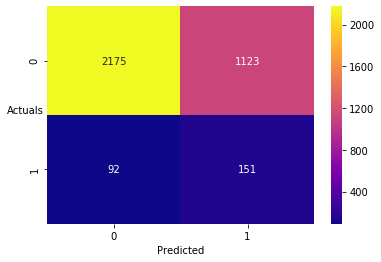

In [86]:
sns.heatmap((metrics.confusion_matrix(Company['default'],alt_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Checking sensitivity of the model

In [67]:
151/(151+92)

0.6213991769547325

62% of those defaulted were correctly identified as defaulters by the model

#### Checking specificity

In [68]:
2175/(2175+1123)

0.6594906003638569

65% of those not defaulted were correctly identified as non-defaulters by the model

##### Checking model efficiency

In [69]:
(2175+151)/(2175+151+1123+92)

0.6568765885343123

Overall 65% of correct predictions to total predictions were made by the model

#### Checking misclassification rate

In [70]:
1-((2175+151)/(2175+151+1123+92))

0.3431234114656877

Clearly, Logistic regression is performing far better than Altman's score

### Lets try one more classifier model called Decision tree & check its accuracy

#### Importing decision tree classifier module

In [71]:
from sklearn import tree 
import matplotlib.pyplot as plt

##### Fitting the model

In [72]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [73]:
clf.fit(Company[['PBT_as_perc_of_total_income','Debt_to_equity_ratio_times']], Company['default'])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### Visualising the tree

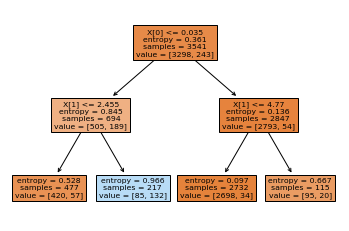

In [74]:
tree.plot_tree(clf.fit(Company[['PBT_as_perc_of_total_income','Debt_to_equity_ratio_times']], Company['default']), filled=True) 
plt.show()

#### Predicting on Actual dataset

In [75]:
y_predict = clf.predict(Company[['PBT_as_perc_of_total_income','Debt_to_equity_ratio_times']])

#### Calculating confusion matrix

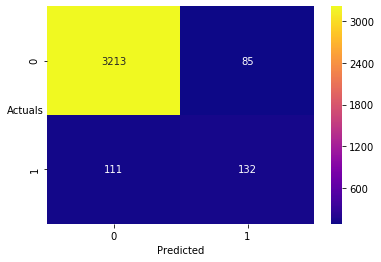

In [87]:
sns.heatmap((metrics.confusion_matrix(Company['default'],y_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Checking sensitivity of the model

In [77]:
132/(132+111)

0.5432098765432098

54% of those not defaulted were correctly identified as non defaulters by the model

#### Checking specificity of the model

In [78]:
3213/(3213+85)

0.9742268041237113

97% of those not defaulted were correctly identified as non defaulters by the model

#### Checking model efficiency

In [79]:
(132+3213)/(132+3213+85+111)

0.9446484044055352

Overall 94% of correct predictions to total predictions were made by the model

#### Checking misclassification rate

In [80]:
1-((132+3213)/(132+3213+85+111))

0.055351595594464786

As per our models and based upon the specificity and accuracy measure, Logistics Regression is a better model. The accuracy of the model can be further improved considering more independent variables in the model.

## END